In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('/kaggle/input/test-file/tested.csv', usecols =['Age', 'Fare', 'Survived'])

In [4]:
df.dropna(inplace= True)

In [5]:
df.shape

(331, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [7]:
X = df.iloc[:, 1:]
y = df.iloc[:,0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)

In [10]:
X_train.head(2)

,Age,Fare
281,0.75,13.775
96,76.00,78.850


In [11]:
clf = DecisionTreeClassifier()

In [12]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [14]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.582089552238806


In [16]:
# cross checking the accuracy using cross validation 
np.mean(cross_val_score(DecisionTreeClassifier(), X,y,cv=10, scoring ='accuracy'))

0.5589126559714795

# **Applying the discretizer**

In [32]:
kbin_age = KBinsDiscretizer(n_bins =15,encode ='ordinal', strategy = 'quantile')
kbin_fare = KBinsDiscretizer(n_bins =15,encode ='ordinal', strategy = 'quantile')

In [33]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1]) 
])

In [42]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [43]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [44]:
trf.named_transformers_['first']

# to get the number of bins
# trf.named_transformers_['first'].n_bins_

KBinsDiscretizer(encode='ordinal', n_bins=15)

In [45]:
# to check the range of bins

trf.named_transformers_['first'].bin_edges_

array([array([ 0.33      , 13.53333333, 18.        , 20.        , 22.        ,
              24.        , 25.2       , 27.73333333, 30.        , 32.        ,
              36.        , 39.        , 43.8       , 47.93333333, 55.        ,
              76.        ])                                                   ],
      dtype=object)

In [46]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf': X_train_trf[:,0],
    'fare': X_train['Fare'],
    'fare_trf': X_train_trf[:,1]
})

In [47]:
output['age_labels'] = pd.cut(x = X_train['Age'], bins = trf.named_transformers_['first'].bin_edges_[0].tolist())

output['fare_labels'] = pd.cut(x = X_train['Fare'], bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [48]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
172,23.0,4.0,13.9000,6.0,"(22.0, 24.0]","(13.0, 14.891]"
318,27.0,6.0,7.8542,2.0,"(25.2, 27.733]","(7.778, 7.896]"
341,32.0,9.0,7.5792,1.0,"(30.0, 32.0]","(7.426, 7.778]"
403,17.0,1.0,47.1000,11.0,"(13.533, 18.0]","(39.0, 58.41]"
319,22.0,4.0,31.5000,10.0,"(20.0, 22.0]","(27.721, 39.0]"


In [49]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf , y_train)
y_pred2 = clf.predict(X_test_trf)

In [50]:
accuracy_score(y_test, y_pred2)

0.5970149253731343

In [51]:
X_trf = trf.fit_transform(X)

In [52]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10, scoring='accuracy'))

0.5620320855614972

In [55]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins =bins,encode ='ordinal', strategy = strategy)
    kbin_fare = KBinsDiscretizer(n_bins =bins,encode ='ordinal', strategy = strategy)
    
    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1]) 
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X,y,cv=10, scoring ='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")
    
    plt.subplot(122)
    plt.hist(X_trf[:,0], color='red')
    plt.title("After")
    
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")
    
    plt.subplot(122)
    plt.hist(X_trf[:,0], color='red')
    plt.title("After")
    
    plt.show()

0.5619429590017825


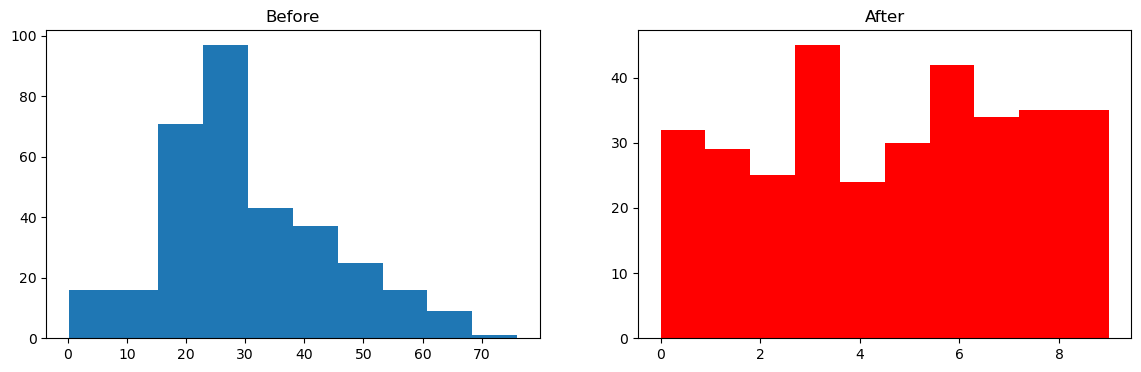

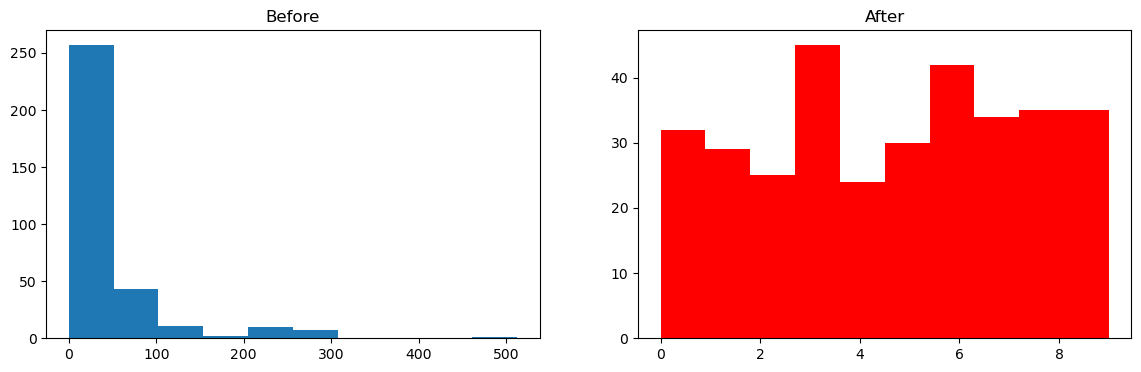

In [56]:
discretize(10, 'quantile')

0.5620320855614972


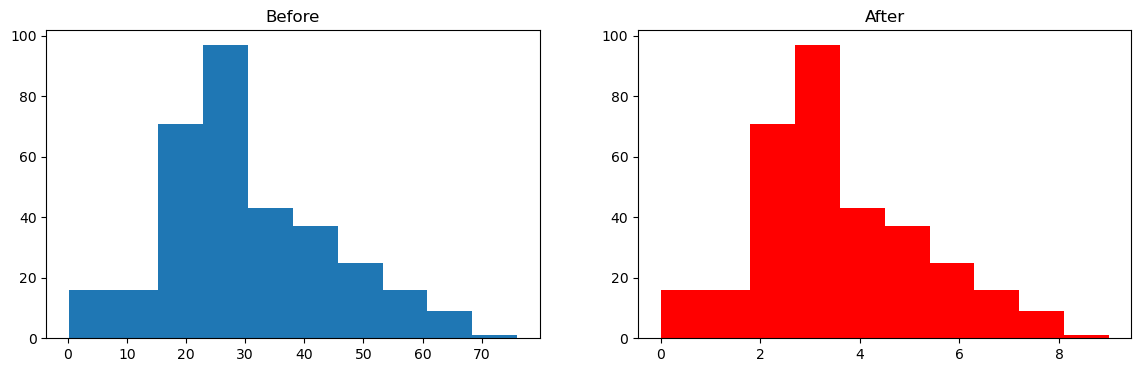

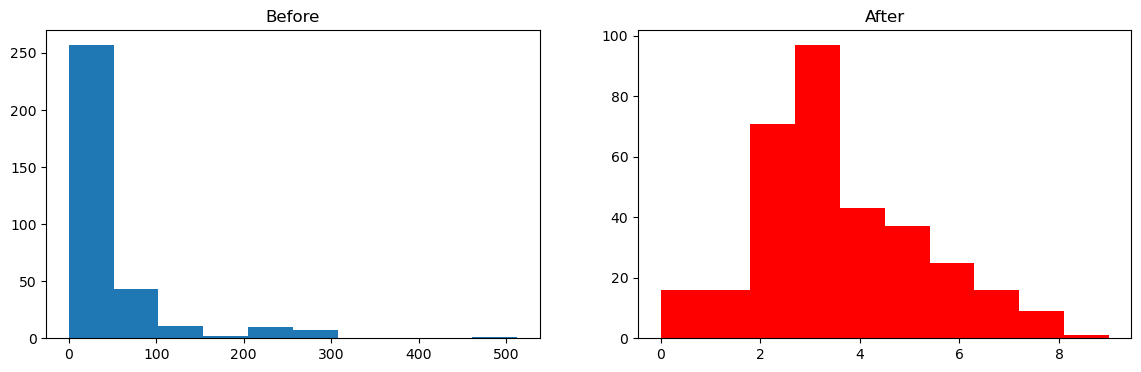

In [58]:
discretize(10, 'uniform')

0.5589126559714794


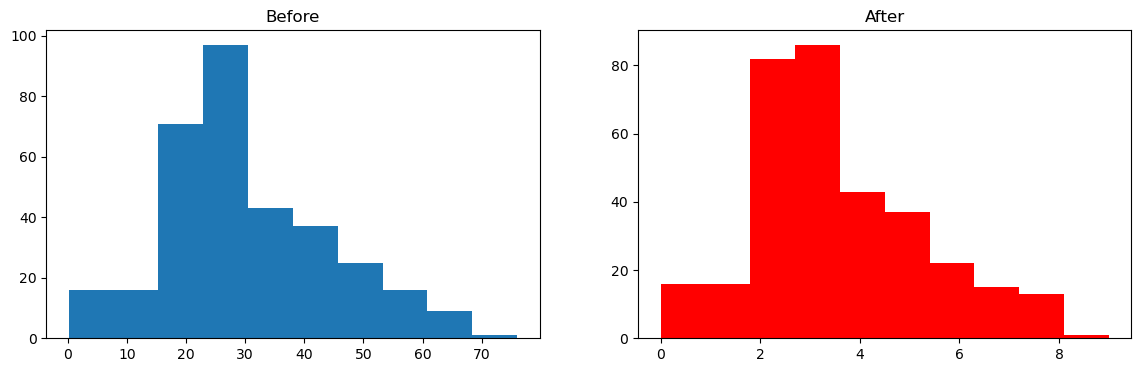

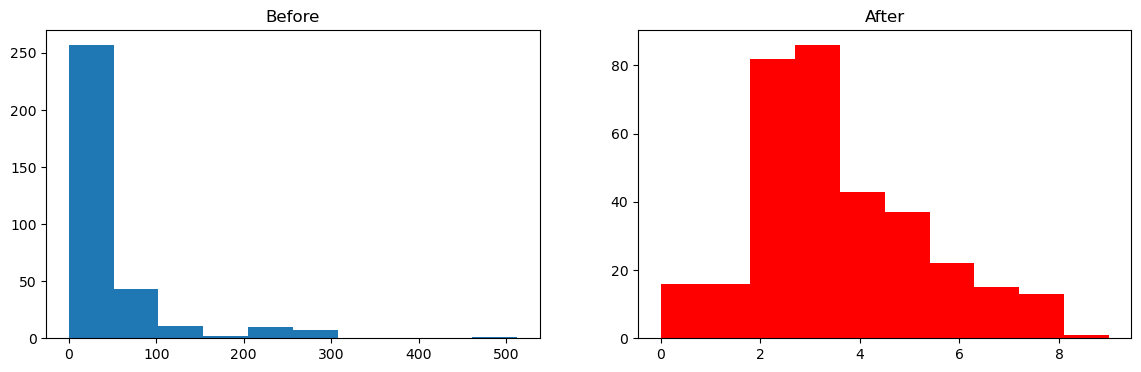

In [59]:
discretize(10, 'kmeans')